<a href="https://colab.research.google.com/github/fursew05/DOE/blob/main/%EC%8B%A4%ED%97%98%EA%B3%84%ED%9A%8D%EB%B2%95_6%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $2^k$ 요인블록배치
- 요인배치실험에서 관찰되는 측정치는 특정 블록의 한 수준에 포함되어 있는 경우
- 블록의 어느 수준에 배치되는지는 랜덤하게 정해진다(Randomized Completely Block Design)
- 블록은 관심이 없지만 결과에 영향을 줄 수 있는 것들을 말한다
- 예시) 화학공정에서 농도와 촉매를 공정 품질에 영향을 준다고 고려했을 때 시간, 온도는 블록이 된다.
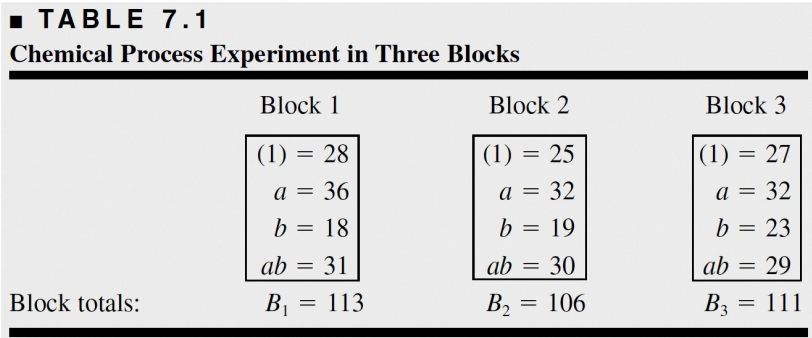

- 다음 그림과 같이 $2^2$ FD에서는 각 블록마다 (1),a,b,ab 모든 수준이 배치되어야 하며, 이 때 측정되는 순서는 랜덤하게 진행

In [ ]:
# Table 7.1 분산분석
import pandas as pd
df = pd.DataFrame({
    "Blocks" : [1,1,1,1,2,2,2,2,3,3,3,3],
    'A' : ['-','+','-','+','-','+','-','+','-','+','-','+'],
    'B' : ['-','-','+','+','-','-','+','+','-','-','+','+'],
    'value' : [28,36,18,31,25,32,19,30,27,32,23,29]
})

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 블록과의 교호작용은 고려하지 않으므로 관심요인 끼리만 곱한 후 블록과 더해준다
model = ols("value ~ C(Blocks) + C(A)*C(B)",data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Blocks),2.0,6.500000,3.250000,0.785235,0.497835
C(A),1.0,208.333333,208.333333,50.335570,0.000394
C(B),1.0,75.000000,75.000000,18.120805,0.005340
C(A):C(B),1.0,8.333333,8.333333,2.013423,0.205710
Residual,6.0,24.833333,4.138889,NaN,NaN


- 블록을 고려하지 않는 경우 Sum of Square Residual이 증가하게 되어 F 통계량 값이 왜곡되어 검정 결과가 바뀔 수도 있음
- 분산분석 결과 A,B의 main effect가 화학 공정 실험에서 유의미한 요인이라는 것을 확인 할 수 있음

## 교락법(Confounding)
- 분석 방법을 간단하게 해주는 방법으로 모든 요인 조합에 대해서 완벽하게 반복 실험이 불가능한 경우에 사용된다

- 고차원의 교호작용은 해석이 힘들고 그 효과가 미미한 경우가 많기 대문에 고차원의 교호작용과 블록효과와 교락시켜 정보를 희생하는 대신, 블록 배치를 통하여 실험의 정확도를 높이는 방법

- 블록 사이즈가 요인 수의 조합 수보다 작을 때 사용할 수 있다 -> 불완전블록배치

- 실험횟수를 늘리지 않고 위의 예시의 경우 (1),a,b,ab를 각 블록마다 배치하지 않고 2개씩 블록에 배치하는 방식이다. 교락법을 적용하면 위의 예시처럼 16회를 진행하지 않고 4번만으로도 진행이 가능해진다.

- 예시 : 예를 들어 2^2 요인배치실험을 진행하는데 실험날짜가 결과에 영향을 줄 수 있고 하루만에 모두 처리조합 즉 4개의 실험을 진행할 수 없다면 실험날짜를 블록으로 설정하여 처리조합을 2개씩 하루마다 진행한다.
-  block1 -> ((1),ab), block2 -> (a,b)

- $2^k$ Factorial Design에서는 $2^p$개의 블록을 배치할 수 있는데, 이때 $p<k$


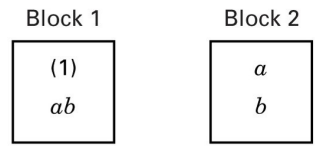

### 블록배치방법 1
- 고차원 + 저차원 배치
- $2^3$ FD 에서는 2~4개의 블록을 배치할 수 있음
- 2개의 블록을 배치할 때 각 요인을 배치하는 방법은 차원대로 배치하는 것
1,3 차원은 블록1에 2,4차원은 블록2에 배치하는 방법

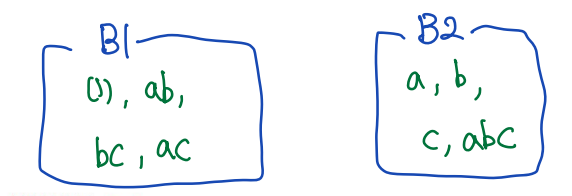

### 블록배치방법 2
- contrast(L) 정의하기
- $L= \alpha_{1}x_{1}+\cdots+\alpha_{i}x_{2}$
- 예시 : $2^3$ FD 에서 2개의 블록에 배치할 때,
$L = x_{1}+x_{2}+x_{3}$의 홀수/짝수 여부에 따라 블록 배치, 이때 $x_{i}$는 i번째 요인 여부이다(low면 0, high면 1)

- (1)의 L = 0 + 0 + 0 = 0 (짝)
- a의 L = 1 + 0 + 0 = 1 (홀)
- b의 L = 0 + 1 + 0 = 1 (홀)
- c의 L = 0 + 0 + 1 = 1 (홀)
- ab의 L = 1 + 1 + 0 = 2 (짝)
- ac의 L = 1 + 0 + 1 = 2 (짝)
- bc의 L = 0 + 1 + 1 = 2 (짝)
- abc의 L = 1 + 1 + 1 = 3 (홀)
- 따라서, (1)과 ab, ac, bc는 블록 1에 a,b,c,abc는 블록 2에 배치한다.

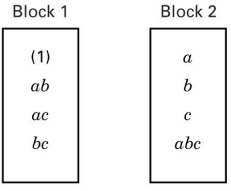


### 블록배치방법 3

- (1)을 포함하는 principal block을 두고 저차원부터 principal block의 요인들을 곱해보면서 진행
- 곱한 결과가 홀수면 ohter block, 짝수면 principal block에 배치
- 각 block 안에 있는 요인들끼리는 곱해도 principal block 요인 중 하나로 나오게 된다
- {(1), ab, ac, bc}, {a,b,c,abc} 두 블록으로 나누어지게 되면,
- ab * ac = a^2bc = bc, ab * bc = ab^2c = ac 이렇게 principal 블록 요인 안의 결과로 나오게 됨, other block도 마찬가지

### 오차 추청
- 분산 분석의 오류를 최대한 줄이기 위해서 블록배치실험을 반복해야 실험의 오차를 줄일 수 있음
- 2^3 FD에서 블록 2개를 활용하여 ABC를 교락한다고 가정하고 4번 반복한다면
2^(3-1)*2*4 = 32회의 실험이 진행된다
- 이 때 반복횟수도 실험결과에 대해 유의미한 영향을 줄 수 있으니 4 수준을 가지는
블록이 생긴다. 총 8개의 블록 (4*2)
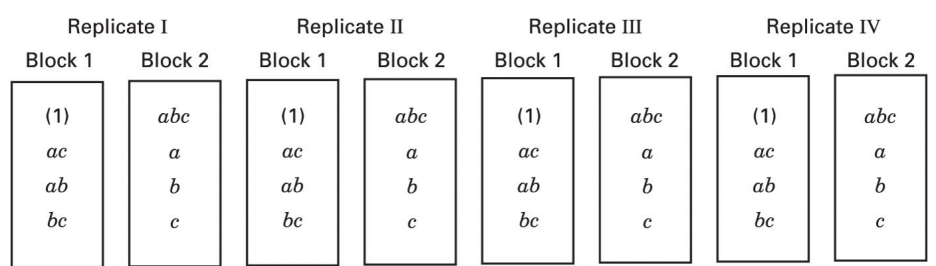

## $2^k ,k>=4$ Factorial Design에서의 블록설계

- 가장 고차원의 교호작용은 설명도 어려우며 효과가 미미한 경우가 많기 때문에 interaction effect를 블록으로 처리하게 된다.

In [19]:
# 예시
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(
    {"temperature" : ["-","+","-","+","-","+","-","+","-","+","-","+","-","+","-","+"],
     "pressure" : ["-","-","+","+","-","-","+","+","-","-","+","+","-","-","+","+"],
     "concentration" : ["-","-","-","-","+","+","+","+","-","-","-","-","+","+","+","+"],
     "stirring_rate" : ["-","-","-","-","-","-","-","-","+","+","+","+","+","+","+","+"],
     'block' : ['+','-','-','+','-','+','+','-','-','-','+','-','+','-','-','+'],
     "filteration_rate" : [45,71,48,65,68,60,80,65,43,100,45,104,75,86,70,96]}
)
model = ols("filteration_rate ~ C(temperature)*C(pressure)*C(concentration)*C(stirring_rate)",data=df).fit()
anova_table = anova_lm(model)
anova_table

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


,df,sum_sq,mean_sq,F,PR(>F)
C(temperature),1.0,1.870562e+03,1870.5625,0.0,NaN
C(pressure),1.0,3.906250e+01,39.0625,0.0,NaN
C(concentration),1.0,3.900625e+02,390.0625,0.0,NaN
C(stirring_rate),1.0,8.555625e+02,855.5625,0.0,NaN
C(temperature):C(pressure),1.0,6.250000e-02,0.0625,0.0,NaN
C(temperature):C(concentration),1.0,1.314062e+03,1314.0625,0.0,NaN
C(pressure):C(concentration),1.0,2.256250e+01,22.5625,0.0,NaN
C(temperature):C(stirring_rate),1.0,1.105563e+03,1105.5625,0.0,NaN
C(pressure):C(stirring_rate),1.0,5.625000e-01,0.5625,0.0,NaN
C(concentration):C(stirring_rate),1.0,5.062500e+00,5.0625,0.0,NaN


### effect 추정 방법

1. main effect와 interaction effect를 아우르는 model matrix를 생성한다.

2. y값(열벡터)와 model matrix의 행렬곱을 진행한 후, $2^{k-1}$로 나눈다.


In [20]:
# model matrix 생성
import numpy as np
cols = ['temperature','pressure','concentration','stirring_rate']
for col in cols:
  df[col] = df[col].map(lambda x: -1 if x=='-' else 1)

model = ols('filteration_rate ~ temperature*pressure*concentration*stirring_rate',data=df)
design_matrix = model.exog
design_matrix_sm_df = pd.DataFrame(design_matrix, columns=model.exog_names)
design_matrix_sm_df

,Intercept,temperature,pressure,temperature:pressure,concentration,temperature:concentration,pressure:concentration,temperature:pressure:concentration,stirring_rate,temperature:stirring_rate,pressure:stirring_rate,temperature:pressure:stirring_rate,concentration:stirring_rate,temperature:concentration:stirring_rate,pressure:concentration:stirring_rate,temperature:pressure:concentration:stirring_rate
0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
5,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
6,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [25]:
# intercept를 제외한 나머지 행렬을 filteration_rate 벡터와 곱한다
estimated_effects = df['filteration_rate']@design_matrix[:,1:]/8
estimated_effects_df = pd.DataFrame({
    "model_term" : design_matrix_sm_df.columns[1:],
    "effects" : estimated_effects
})
estimated_effects_df

,model_term,effects
0,temperature,21.625
1,pressure,3.125
2,temperature:pressure,0.125
3,concentration,9.875
4,temperature:concentration,-18.125
5,pressure:concentration,2.375
6,temperature:pressure:concentration,1.875
7,stirring_rate,14.625
8,temperature:stirring_rate,16.625
9,pressure:stirring_rate,-0.375


- main effect들의 영향력을 비교했을 때 pressure가 상대적으로 약한 것을 확인할 수 있음
- effect 값이 큰 temperature, concentration, temperature:concentration, stirring_rate,temperature:stirring_rate와 block에 대해서 분산분석 수행

In [34]:
model = ols("filteration_rate ~ block + temperature + concentration + temperature:concentration + stirring_rate + temperature:stirring_rate",data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
block,1.0,151.667659,151.667659,7.387377,0.023686
temperature,1.0,1766.802099,1766.802099,86.056797,0.000007
concentration,1.0,432.533316,432.533316,21.067686,0.001309
temperature:concentration,1.0,1247.751093,1247.751093,60.775037,0.000027
stirring_rate,1.0,832.793503,832.793503,40.563423,0.000130
temperature:stirring_rate,1.0,1114.613968,1114.613968,54.290239,0.000042
Residual,9.0,184.775862,20.530651,NaN,NaN


- 모든 effect들이 통계적으로 유의한 것을 확인할 수 있음